The dataset used on this notebook can be found <a href="https://www.kaggle.com/uciml/iris">here</a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('iris.csv')

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.SepalLengthCm /= data.SepalLengthCm.max()
data.PetalLengthCm /= data.PetalLengthCm.max()
data.SepalWidthCm /= data.SepalWidthCm.max()
data.PetalWidthCm /= data.PetalWidthCm.max()

In [7]:
def matrices_to_vector(matrices):
    vec = list()
    for matrix in matrices:
        vec.append(matrix.reshape(1, -1))
    return np.array(vec).reshape(1, -1)

In [8]:
def vector_to_matrices(vect, in_size, hid_size, out_size):
    matrices = []
    matrices.append(
        np.array(vect[:in_size*hid_size]).reshape(hid_size, in_size))
    matrices.append(np.array(
        vect[in_size*hid_size:in_size*hid_size+hid_size*out_size]).reshape(out_size, hid_size))
    return matrices

In [9]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, size_pop,
                 inputs_list, targets_list, crossover_rate, mutation_rate, k, generations):

        self.input_list = inputs_list
        self.targets_list = targets_list
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.size_pop = size_pop
        self.k = k
        self.num_genes = self.input_nodes*self.hidden_nodes + \
            self.output_nodes*self.hidden_nodes
        self.activation_function = lambda x: 1/(1+np.exp(-x))
        self.pop = self.generate_random_pop()
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.scores = []

    def generate_random_pop(self):
        return [np.array([np.random.normal() for i in range(self.num_genes)]) for j in range(self.size_pop)]

    def accuracy(self, y, y_pred):
        return np.mean([s == t for s, t in zip(np.argmax(y, axis=0), np.argmax(np.reshape(np.array(y_pred), y.shape), axis=0))])

    def fitness(self, ind):
        matrices = vector_to_matrices(
            ind, self.input_nodes, self.hidden_nodes, self.output_nodes)
        self.weights_input_to_hidden = matrices[0]
        self.weights_hidden_to_output = matrices[1]
        final_outputs = self.run()
        return self.accuracy(final_outputs, self.targets_list)

    def select_parents(self):
        parents = []
        for t in range(self.size_pop):
            idx = np.random.randint(0, self.size_pop, size=self.k)
            g_idx = 0
            score = -np.inf
            for ii in idx:
                if self.fitness(self.pop[ii]) > score:
                    score = self.fitness(self.pop[ii])
                    g_idx = ii
            parents.append(self.pop[g_idx])
        return parents

    def generate_childrens(self, parents):
        new_pop = []
        for i in range(self.size_pop//2):
            parent1 = parents[np.random.choice(len(parents))]
            parent2 = parents[np.random.choice(len(parents))]

            if np.random.random() < self.crossover_rate:
                slice_ = np.random.randint(1, len(parent1)-1)
                son1 = np.concatenate([parent1[:slice_], parent2[slice_:]])
                son2 = np.concatenate([parent2[:slice_], parent1[slice_:]])
                new_pop.append(son1)
                new_pop.append(son2)

            else:
                new_pop.append(parent1)
                new_pop.append(parent2)

        return new_pop

    def mutation(self, indv):
        new_indv = []
        for i in indv:
            if np.random.random() < self.mutation_rate:
                new_indv.append(np.random.normal())
            else:
                new_indv.append(i)

        return new_indv

    def optimize(self):
        for g in range(self.generations):
            parents = self.select_parents()
            new_pop = self.generate_childrens(parents)
            new_pop = [self.mutation(indv) for indv in new_pop]
            self.pop = new_pop
            self.scores.append(self.evaluate())
            print("Epoch {}/{} ... Mean accuracy:{}".format(g,
                                                            self.generations, self.evaluate()))

    def run(self):

        inputs = np.array(self.input_list, ndmin=2).T

        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
        final_outputs = final_inputs

        return final_outputs

    def evaluate(self):
        return np.mean([self.fitness(indv) for indv in self.pop])

In [10]:
inputs_list = list(np.array(data.drop(['Species', 'Id'], axis=1)))

In [11]:
targets_list = list(np.array(pd.get_dummies(data.Species)))

In [12]:
nn = NeuralNetwork(input_nodes=4, hidden_nodes=50, output_nodes=3, size_pop=2000, 
                   inputs_list=inputs_list, targets_list=targets_list, crossover_rate=0.7, 
                   mutation_rate=1e-5, k=5,generations=100)

In [13]:
nn.optimize()

Epoch 0/100 ... Mean accuracy:0.3353533333333333
Epoch 1/100 ... Mean accuracy:0.33741999999999994
Epoch 2/100 ... Mean accuracy:0.3400066666666667
Epoch 3/100 ... Mean accuracy:0.3418066666666666
Epoch 4/100 ... Mean accuracy:0.3432933333333333
Epoch 5/100 ... Mean accuracy:0.34625666666666666
Epoch 6/100 ... Mean accuracy:0.34900999999999993
Epoch 7/100 ... Mean accuracy:0.35220333333333326
Epoch 8/100 ... Mean accuracy:0.36089
Epoch 9/100 ... Mean accuracy:0.3827433333333332
Epoch 10/100 ... Mean accuracy:0.40602666666666654
Epoch 11/100 ... Mean accuracy:0.4066433333333332
Epoch 12/100 ... Mean accuracy:0.4066233333333332
Epoch 13/100 ... Mean accuracy:0.4065699999999999
Epoch 14/100 ... Mean accuracy:0.4065033333333332
Epoch 15/100 ... Mean accuracy:0.4065166666666665
Epoch 16/100 ... Mean accuracy:0.40646999999999983
Epoch 17/100 ... Mean accuracy:0.40663666666666654
Epoch 18/100 ... Mean accuracy:0.4065599999999998
Epoch 19/100 ... Mean accuracy:0.40646999999999983
Epoch 20/100 

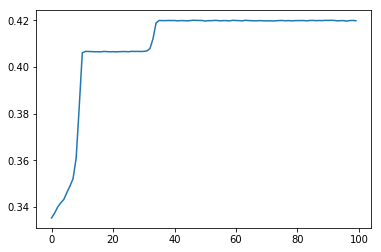

In [15]:
plt.plot(nn.scores)